# Real-time Handwritten Digit Recognition

#### Imports

In [53]:
import tensorflow as tf
import keras
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cv2 import *
from PIL import Image

In [112]:
x_train.shape

(60000, 28, 28)

#### Data Loading and Preprocessing

In [54]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [55]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


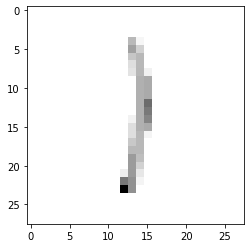

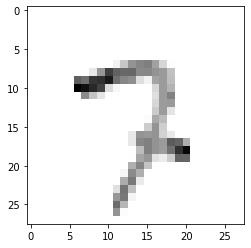

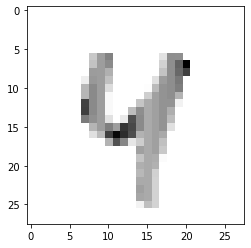

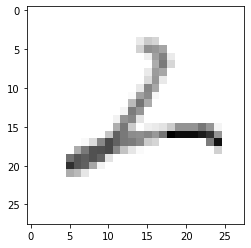

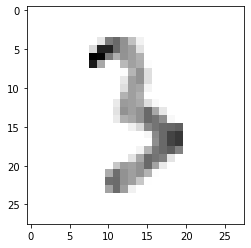

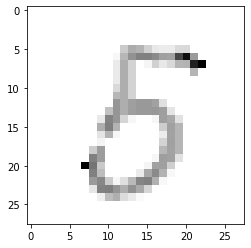

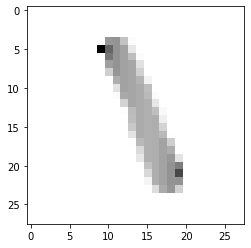

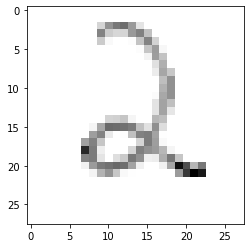

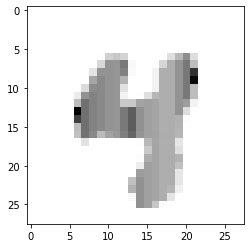

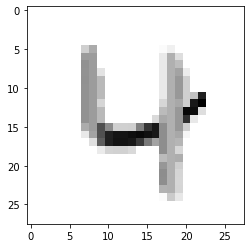

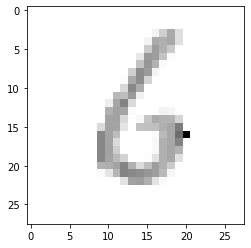

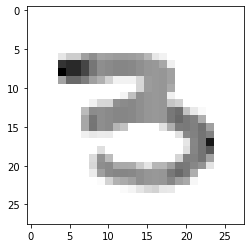

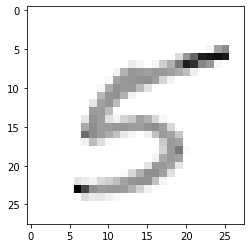

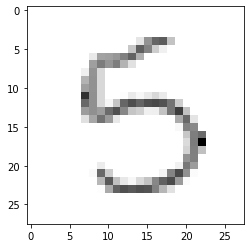

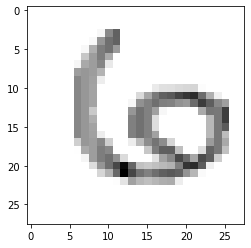

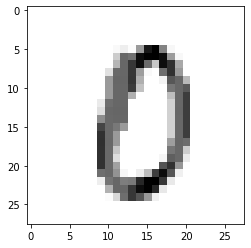

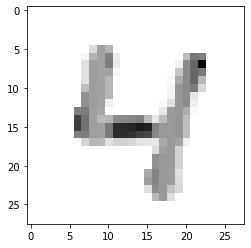

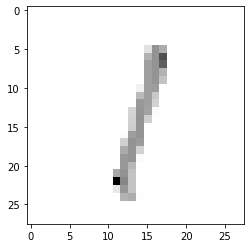

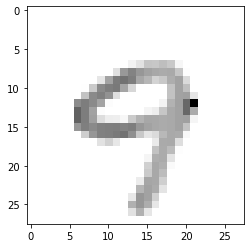

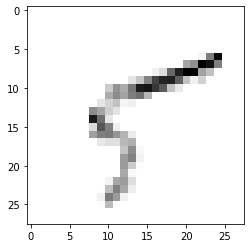

In [110]:
for i in range(40,60):
  plt.imshow(x_test[i], cmap = plt.cm.binary)
  plt.show()

In [57]:
#Normalising Data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [113]:
x_train.shape

(60000, 28, 28)

#### Building Model

In [61]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0549 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0332 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0180 - accuracy: 0.9940: 0s - los
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - l

#### Test Predictions

In [62]:
predictions = model.predict([x_test])

Consider rewriting this model with the Functional API.


In [63]:
print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))
print(np.argmax(predictions[2]))
print(np.argmax(predictions[3]))
print(np.argmax(predictions[4]))

7
2
1
0
4


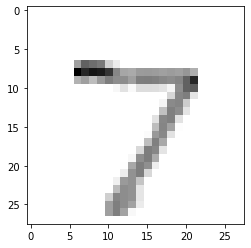

In [64]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [65]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9702
0.11658338457345963 0.9702476263046265


#### Predicting real life images

In [76]:
def savePic():
    print('here')
    cam = VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    if s:    # frame captured without any errors
        namedWindow("cam-test")
        imshow("cam-test",img)
        destroyWindow("cam-test")
        imwrite("test.jpg",img) #save image
    cam.release()

here
307200


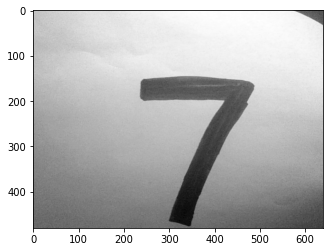

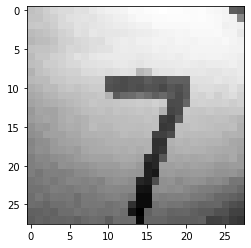

(1, 28, 28)
[[6.1577743e-01 4.0627645e-05 4.4212257e-03 3.4865495e-03 3.2145728e-09
  5.1144366e-07 1.8485578e-06 3.6826262e-01 1.7767007e-07 8.0090892e-03]]
Probability Distribution for 0 0.61577743
Probability Distribution for 1 4.0627645e-05
Probability Distribution for 2 0.0044212257
Probability Distribution for 3 0.0034865495
Probability Distribution for 4 3.2145728e-09
Probability Distribution for 5 5.1144366e-07
Probability Distribution for 6 1.8485578e-06
Probability Distribution for 7 0.36826262
Probability Distribution for 8 1.7767007e-07
Probability Distribution for 9 0.008009089
The Predicted Value is 0


In [83]:
savePic()
img_array = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = user_test.reshape(1,28,28)
print(user_test.shape)
user_test = tf.keras.utils.normalize(new_array, axis = 1)

user_test = user_test.reshape(1,28,28)
# print(user_test.shape)
predicted = model.predict([user_test])
print(predicted)
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

    
    
    
    

921600


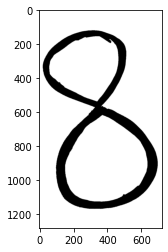

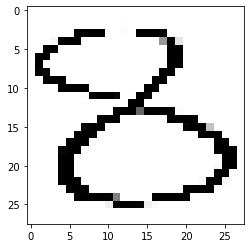

Probability Distribution for 0 4.1484746e-10
Probability Distribution for 1 0.95333815
Probability Distribution for 2 0.03795766
Probability Distribution for 3 0.008594608
Probability Distribution for 4 4.3184053e-07
Probability Distribution for 5 1.5958116e-06
Probability Distribution for 6 3.061967e-08
Probability Distribution for 7 9.465995e-05
Probability Distribution for 8 1.2803625e-05
Probability Distribution for 9 1.2449673e-12
The Predicted Value is 1


In [108]:
# savePic()
col = Image.open('8.jpg')
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict(np.array([[user_test]]))
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))
